In [1]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x_data = iris.data[:,:2]#150*2
y_data = iris.target

x_train,x_test,y_train,y_test = train_test_split(x_data, y_data)

In [3]:
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [4]:
def plot(model):
    
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    # 建立網格矩陣
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高線圖
    cs = plt.contourf(xx, yy, z)

d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


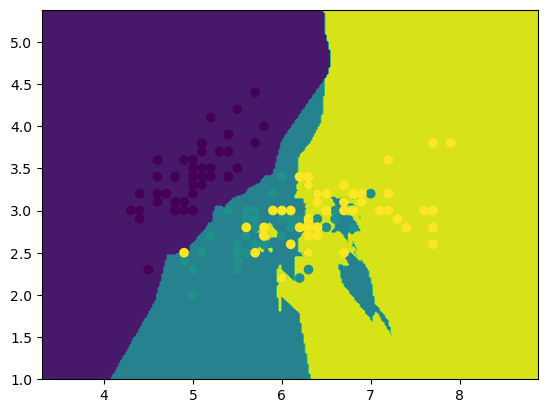

d:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6842105263157895

In [5]:

plot(knn)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

knn.score(x_test, y_test)

In [6]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

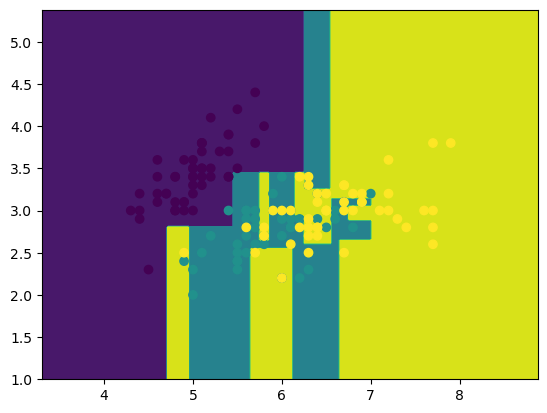

0.6052631578947368

In [7]:

plot(dtree)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

dtree.score(x_test, y_test)

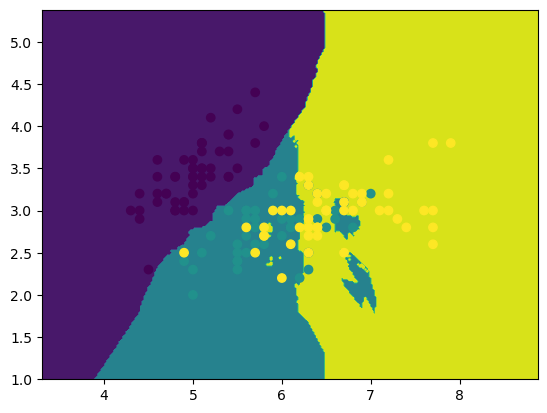

0.7368421052631579

In [8]:
bagging_knn = BaggingClassifier(knn, n_estimators=100)

bagging_knn.fit(x_train, y_train)
plot(bagging_knn)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_knn.score(x_test, y_test)

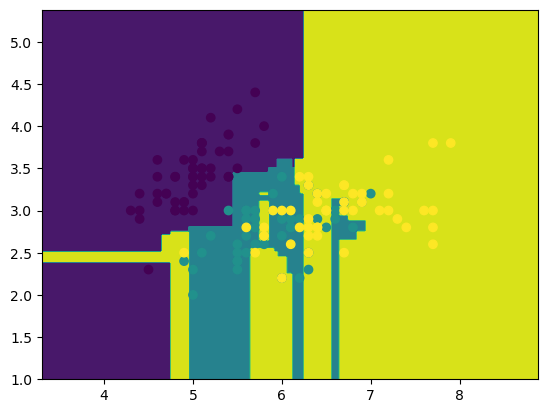

0.631578947368421

In [9]:
bagging_tree = BaggingClassifier(dtree, n_estimators=100)

bagging_tree.fit(x_train, y_train)
plot(bagging_tree)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()
bagging_tree.score(x_test, y_test)